# Data statistics 

- statistics of objects for training

Neural network will be trained on objects from tree main groups:
1) **Cylinder (rocket bodies)** - Falcon9, Atlas 5(V), Delta 4, H-2A
2) **Boxwing (satellites)** - Navstar (GPS), Galileo (GIOVE), Beidu, Astra, Meteosat, Globalstar (LEO), Intelsat (for validation)
3) **Nonsymetric** - Iridium, Starlink, Orbcomm

## Cylindric objects


### Histogram of signal ratio per object
![](../../plots/light_curves/cylinder/histogram_signal_ratio_cylinder.png)

### Falcon 9
<center>
<img src="../../plots/light_curves/cylinder/lc_falcon_9.png" width="900">
</center>

### Atlas 5
<center>
<img src="../../plots/light_curves/cylinder/lc_atlas_5.png" width="900">
</center>

### Delta 4 
<center>
<img src="../../plots/light_curves/cylinder/lc_delta_4.png" width="900">
</center>



## Asymetric




### Histogram of signal ratio per object
![](../../plots/light_curves/asymetric/histogram_signal_ratio_asymetric.png)

### Iridium
<center>
<img src="../../plots/light_curves/asymetric/lc_iridium.png" width="900">
</center>

### Orbcomm
<center>
<img src="../../plots/light_curves/asymetric/lc_orbcomm.png" width="900">
</center>

## Box-wing

### Histogram of signal ratio per object
![](../../plots/light_curves/boxwing/histogram_signal_ratio_boxwing.png)

### Astra
<center>
<img src="../../plots/light_curves/boxwing/lc_astra.png" width="900">
</center> 


### Beidou
<center>
<img src="../../plots/light_curves/boxwing/lc_beidou.png" width="900">
</center> 


### Giove
<center>
<img src="../../plots/light_curves/boxwing/lc_giove.png" width="900">
</center> 


### Intelsat
<center>
<img src="../../plots/light_curves/boxwing/lc_intelsat.png" width="900">
</center> 


### Meteosat
<center>
<img src="../../plots/light_curves/boxwing/lc_meteosat.png" width="900">
</center> 


### Navstar
<center>
<img src="../../plots/light_curves/boxwing/lc_navstar.png" width="900">
</center> 

## Code

### Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import tqdm
import time
import os
import sys
from collections import defaultdict
import pandas as pd

In [13]:
DATA_PATH = "c:/Users/danok/work/dizertacka/resources/Fall_2021_2"

In [14]:
sys.path.append('../')
from preprocessing.load_multi_array import load_multi_array

In [15]:
objects = {"cylinder": ("falcon_9", "atlas_5", "atlas_V", "delta_4", "h_2a"), 
           "boxwing": ("navstar", "giove", "beidou", "astra", "meteosat", "globstar", "intelsat"),
           "nonsymetric": ("iridium", "orbcomm")}

In [21]:
data = defaultdict(lambda : defaultdict(lambda: defaultdict(tuple)))
data_frame_data = []

# for folder in glob.iglob(f"{DATA_PATH}/*"):
#     folder_name = os.path.split(folder)[1]
    
files = [p for p in glob.iglob(f"{DATA_PATH}/*multi_array.npy")]

for file in tqdm.tqdm_notebook(files, desc=f"Folder {DATA_PATH}"):
    object_name = os.path.split(file)[1]
    arr = load_multi_array(file)
    n = int(len(arr))
    stat = np.sum(arr != 0, axis=1) / 300
    p_50 = np.sum(stat >0.5)/n 
    p_min = np.min(stat)
    p_max = np.max(stat)
    p_mean = np.mean(stat)

    for key1 in objects:
        for key2 in objects[key1]:
            if key2 in object_name.lower():
                data[key1][key2][object_name] = (n, p_max, p_min, p_mean, p_50) 
                data_frame_data.append([key1, key2, object_name, n, p_max, p_min, p_mean ,p_50])


df = pd.DataFrame(data_frame_data, columns=["type", "object_name", "name", "n_curves", "p_max", "p_min", "p_mean", "p_50"])
df.to_csv("stats_Fall_2021_2.csv", index=False)

C:\Users\danok\AppData\Local\Temp/ipykernel_9572/2403562254.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm.tqdm_notebook(files, desc=f"Folder {DATA_PATH}"):


Folder c:/Users/danok/work/dizertacka/resources/Fall_2021_2:   0%|          | 0/495 [00:00<?, ?it/s]

(14, 300)
(5, 300)
(42, 300)
(3, 300)
(20, 300)
(58, 300)
(550, 300)
(2127, 300)
(1033, 300)
(4, 300)
(22, 300)
(31, 300)
(28, 300)
(6, 300)
(87, 300)
(12, 300)
(56, 300)
(4, 300)
(2691, 300)
(334, 300)
(11, 300)
(38, 300)
(23, 300)
(20, 300)
(2, 300)
(704, 300)
(98131, 300)
(11, 300)
(54, 300)
(10, 300)
(233, 300)
(3857, 300)
(260, 300)
(3, 300)
(45, 300)
(10, 300)
(13691, 300)
(11787, 300)
(396, 300)
(1113, 300)
(6472, 300)
(197, 300)
(166, 300)
(2429, 300)
(64, 300)
(16683, 300)
(167, 300)
(430, 300)
(100, 300)


KeyboardInterrupt: 

In [11]:
import json

In [12]:
print(json.dumps(data, sort_keys=True, indent=4))

{
    "cylinder": {
        "atlas_5": {
            "ATLAS_5_CENTAUR_R_B_FIA_Radar_3_r_multi_array.npy": [
                64,
                1.0,
                0.043333333333333335,
                0.7616666666666667,
                0.78125
            ],
            "ATLAS_5_CENTAUR_R_B_multi_array.npy": [
                1563,
                1.0,
                0.0033333333333333335,
                0.45146726380891455,
                0.4107485604606526
            ]
        },
        "delta_4": {
            "DELTA_4_R_B_multi_array.npy": [
                838,
                0.9966666666666667,
                0.0033333333333333335,
                0.40038186157517897,
                0.32577565632458233
            ]
        }
    }
}


###  Heslo : quad

In [16]:
data = defaultdict(lambda : defaultdict(lambda: defaultdict(tuple)))

# for folder in glob.iglob(f"{DATA_PATH}/*"):
#     folder_name = os.path.split(folder)[1]
    
files = [p for p in glob.iglob(f"{DATA_PATH}/*multi_array.npy")]

for file in tqdm.tqdm_notebook(files, desc=f"Folder {DATA_PATH}"):
    object_name = os.path.split(file)[1]
    arr = load_multi_array(file)
    n = int(len(arr))
    stat = np.sum(arr != 0, axis=1) / n
    p_50 = np.sum(stat >0.5)/n 
    p_min = np.min(stat)
    p_max = np.max(stat)
    p_mean = np.mean(stat)

    for key1 in objects:
        for key2 in objects[key1]:
            if key2 in object_name.lower():
                data[key1][key2][object_name] = (arr, n, p_max, p_min, p_mean, p_50) 

C:\Users\danok\AppData\Local\Temp/ipykernel_11972/829759600.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm.tqdm_notebook(files, desc=f"Folder {DATA_PATH}"):


Folder c:/Users/danok/work/charon_share/Fall_2021_2:   0%|          | 0/74 [00:00<?, ?it/s]

ATLAS_5_CENTAUR_R_B_FIA_Radar_3_r_multi_array.npy
ATLAS_5_CENTAUR_R_B_multi_array.npy


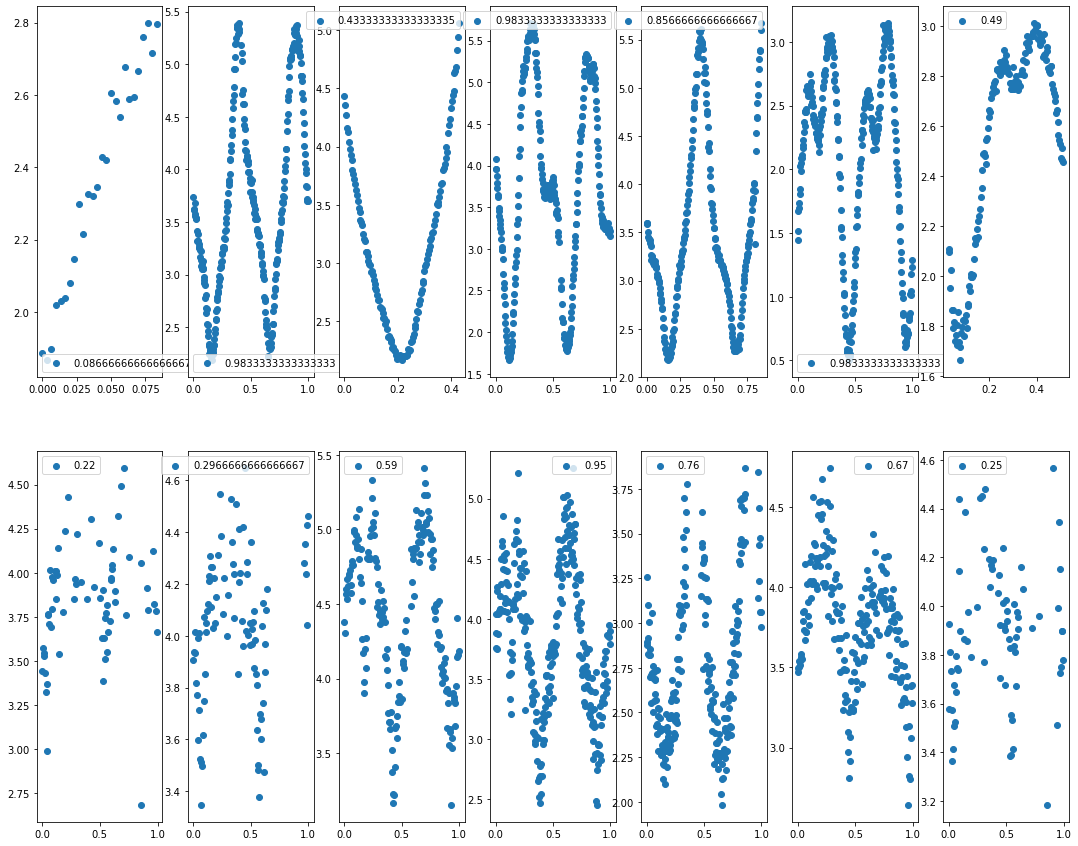

In [17]:
fig, axs = plt.subplots(2, 7)
fig.set_size_inches(18.5, 15, forward=True)
j = 0

x = np.arange(300)/300

for t, d in data['cylinder']['atlas_5'].items():
    print(t)
    arr, n, p_max, p_min, p_mean, p_50 = d 
    idxs = np.random.choice(np.arange(n),7)
    
    for i, idx in enumerate(idxs):
        p = np.sum(arr[idx] != 0) / 300
        axs[j, i].scatter(x[arr[idx] != 0], arr[idx][arr[idx]!= 0], label=f'{p}')
        axs[j,i].legend()
    
    j += 1
plt.show()
    
    
    